In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
help(pd).read_csv

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data.
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic an

AttributeError: 'NoneType' object has no attribute 'read_csv'

In [3]:

url = "https://raw.githubusercontent.com/luistfact/Multivariate-analysis/refs/heads/main/Credit.csv"
df = pd.read_csv(url)

df.head()


ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

# ***Analisis Exploratorio de los datos***

In [4]:
print(df.head())


   ID   Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   1   14.891   3606     283      2   34         11    Male      No     Yes   
1   2  106.025   6645     483      3   82         15  Female     Yes     Yes   
2   3  104.593   7075     514      4   71         11    Male      No      No   
3   4  148.924   9504     681      3   36         11  Female      No      No   
4   5   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331  


In [5]:
df.drop('ID',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [ ]:
df.shape

(400, 11)

In [ ]:
def get_summary(df):
    df_desc = pd.DataFrame(df.describe(include='all').transpose())
    df_summary = pd.DataFrame({
        'dtype': df.dtypes,
        '#missing': df.isnull().sum().values,
        '#duplicates': df.duplicated().sum(),
        '#unique': df.nunique().values,
        'min': df_desc['min'].values,
        'max': df_desc['max'].values,
        'avg': df_desc['mean'].values,
        'std dev': df_desc['std'].values,
    })
    return df_summary

get_summary(df).style.background_gradient()

In [ ]:
df.describe()

Income         Limit      Rating       Cards         Age  \
count  400.000000    400.000000  400.000000  400.000000  400.000000   
mean    45.218885   4735.600000  354.940000    2.957500   55.667500   
std     35.244273   2308.198848  154.724143    1.371275   17.249807   
min     10.354000    855.000000   93.000000    1.000000   23.000000   
25%     21.007250   3088.000000  247.250000    2.000000   41.750000   
50%     33.115500   4622.500000  344.000000    3.000000   56.000000   
75%     57.470750   5872.750000  437.250000    4.000000   70.000000   
max    186.634000  13913.000000  982.000000    9.000000   98.000000   

        Education      Balance  
count  400.000000   400.000000  
mean    13.450000   520.015000  
std      3.125207   459.758877  
min      5.000000     0.000000  
25%     11.000000    68.750000  
50%     14.000000   459.500000  
75%     16.000000   863.000000  
max     20.000000  1999.000000

Encontramos que hay aproximadamente 400 observaciones

In [ ]:
def estadisticas_descriptivas_univariadas(columna):
    # Calcular estadísticas
    estadisticas = {
        'Media': [columna.mean()],
        'Mediana': [columna.median()],
        'Moda': [columna.mode().iloc[0]],
        'Desviacion estandar': [columna.std()],
        'Varianza': [columna.var()],
        'Rango': [columna.max() - columna.min()],
        'Percentiles 25%': [columna.quantile(0.25)], # Create individual keys for each percentile
        'Percentiles 50%': [columna.quantile(0.5)],
        'Percentiles 75%': [columna.quantile(0.75)],
        'maximo': [columna.max()],
        'minimo': [columna.min()],
        'coeficiente de variacion': [columna.std() / columna.mean()],
        'RIC': [columna.quantile(0.75) - columna.quantile(0.25)],
        '% de nulos': [columna.isna().mean()],
        'numero de datos': [columna.count()]
    }
    # Devolver el DataFrame con las estadísticas
    return pd.DataFrame(estadisticas)


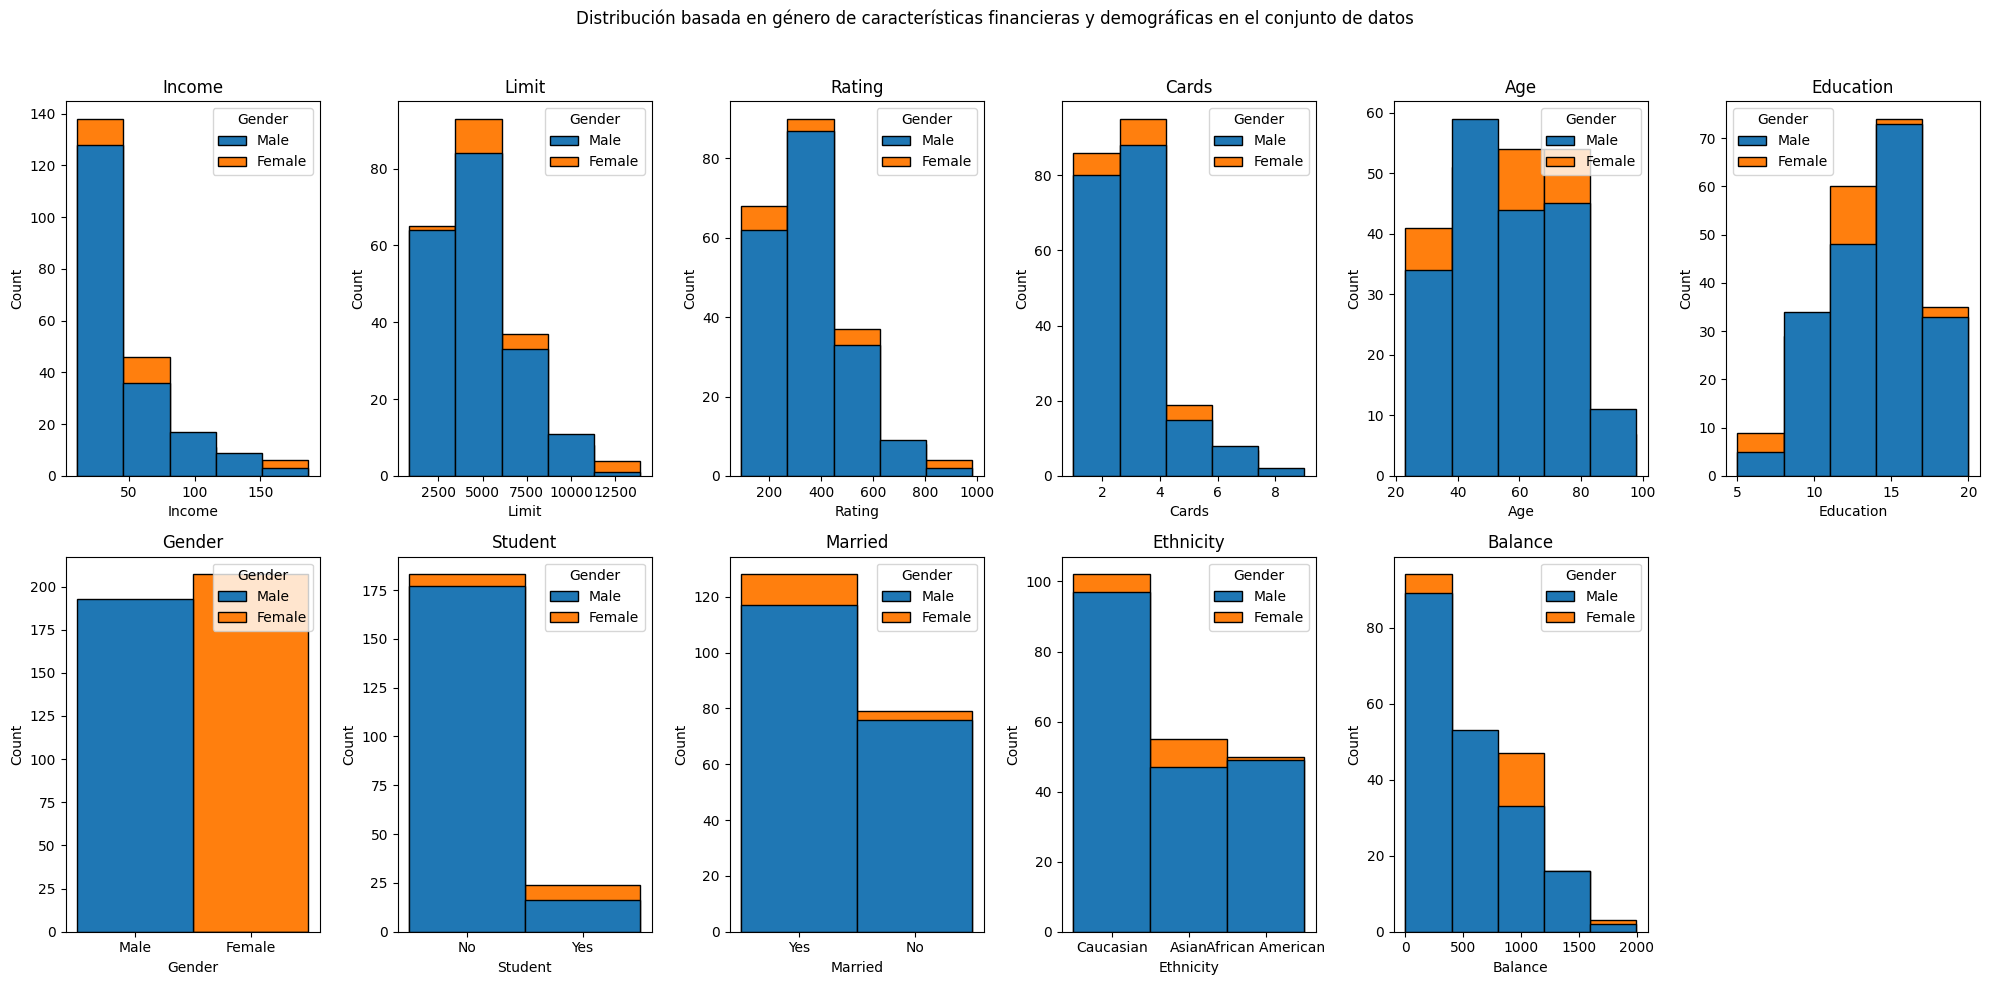

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las columnas que quieres graficar (incluyendo Balance)
columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']

# Crear subgráficos: 2 filas, 6 columnas para las 11 variables
fig, ax = plt.subplots(2, 6, figsize=(20, 10))
axes = ax.flatten()

# Iterar sobre las columnas y los ejes para crear los histogramas con hue para 'Gender'
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, hue='Gender', ax=axes[i], bins=5, edgecolor='black', alpha=1)
    axes[i].set_title(col)  # Agregar el nombre de la columna como título

# Eliminar cualquier gráfico extra si hay menos variables que subgráficos
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])  # Remover los ejes sobrantes

# Título general
fig.suptitle("Distribución basada en género de características financieras y demográficas en el conjunto de datos")

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajustar para dejar espacio al título
plt.show()


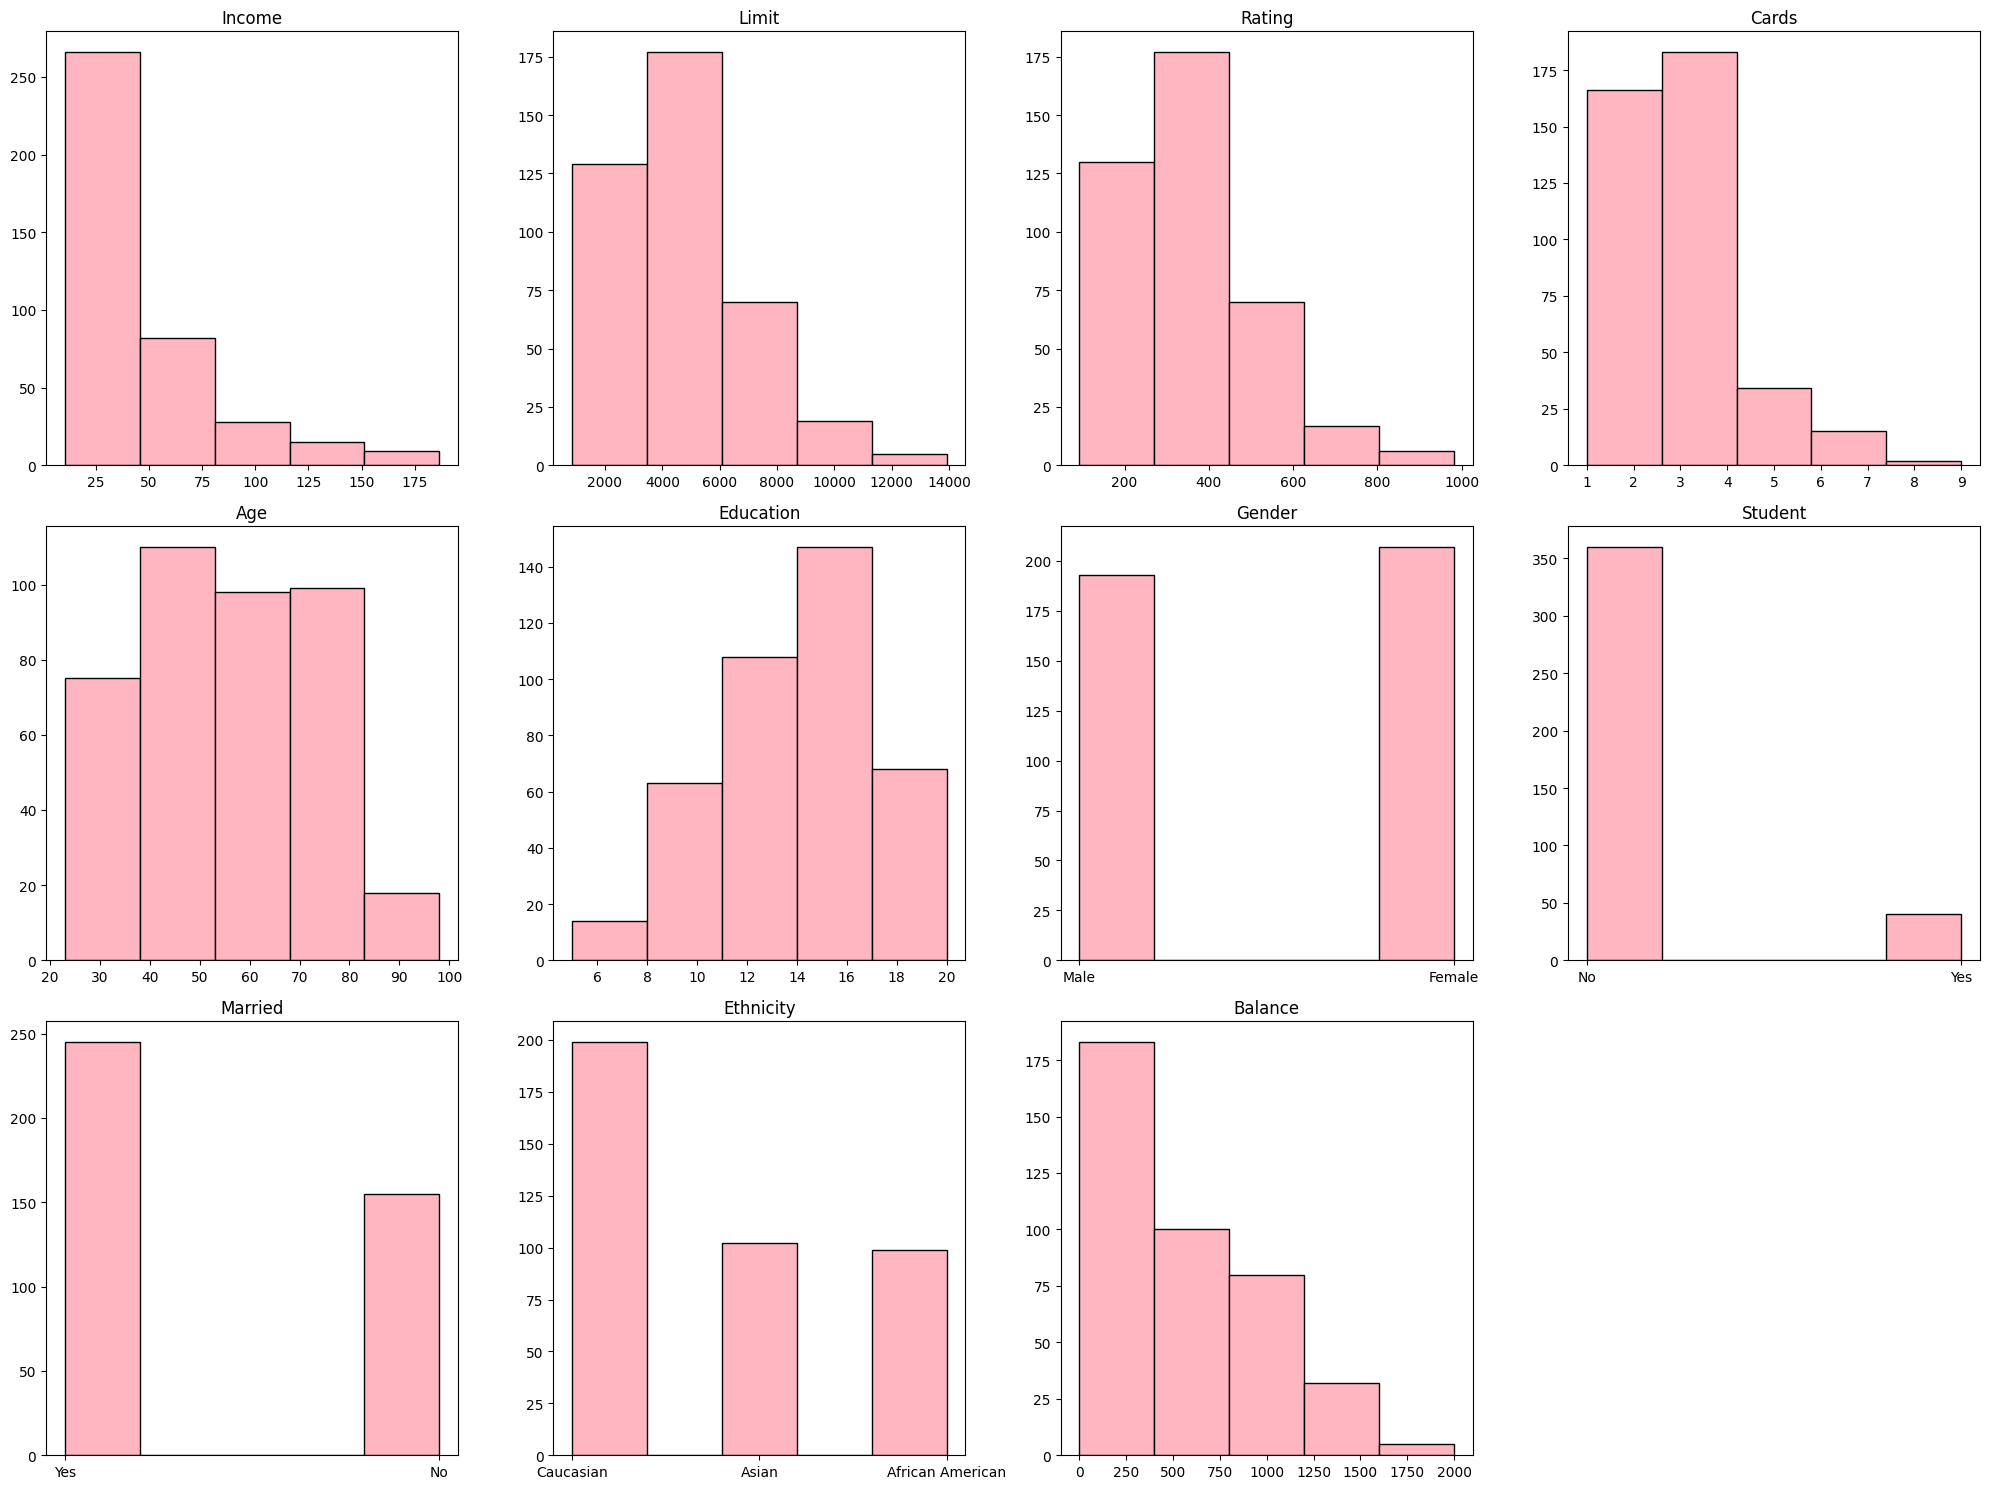

In [ ]:
# Definir las columnas que quieres graficar (incluyendo Balance)
columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance']

# Crear subgráficos: 3 filas, 4 columnas (ajustado para las 11 variables)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))  # 3 filas, 4 columnas para 11 variables
axes = axes.flatten()  # Aplanar la matriz de ejes

# Iterar sobre las columnas y los ejes para crear los histogramas
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=5, color='lightpink', edgecolor='black', alpha=1)
    axes[i].set_title(col)  # Agregar el nombre de la columna como título

# Eliminar cualquier gráfico extra si hay menos variables que subgráficos
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])  # Remover los ejes sobrantes

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout()
plt.show()

In [ ]:
# Definir las columnas objetivo y características
target_col = 'Balance'
features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']


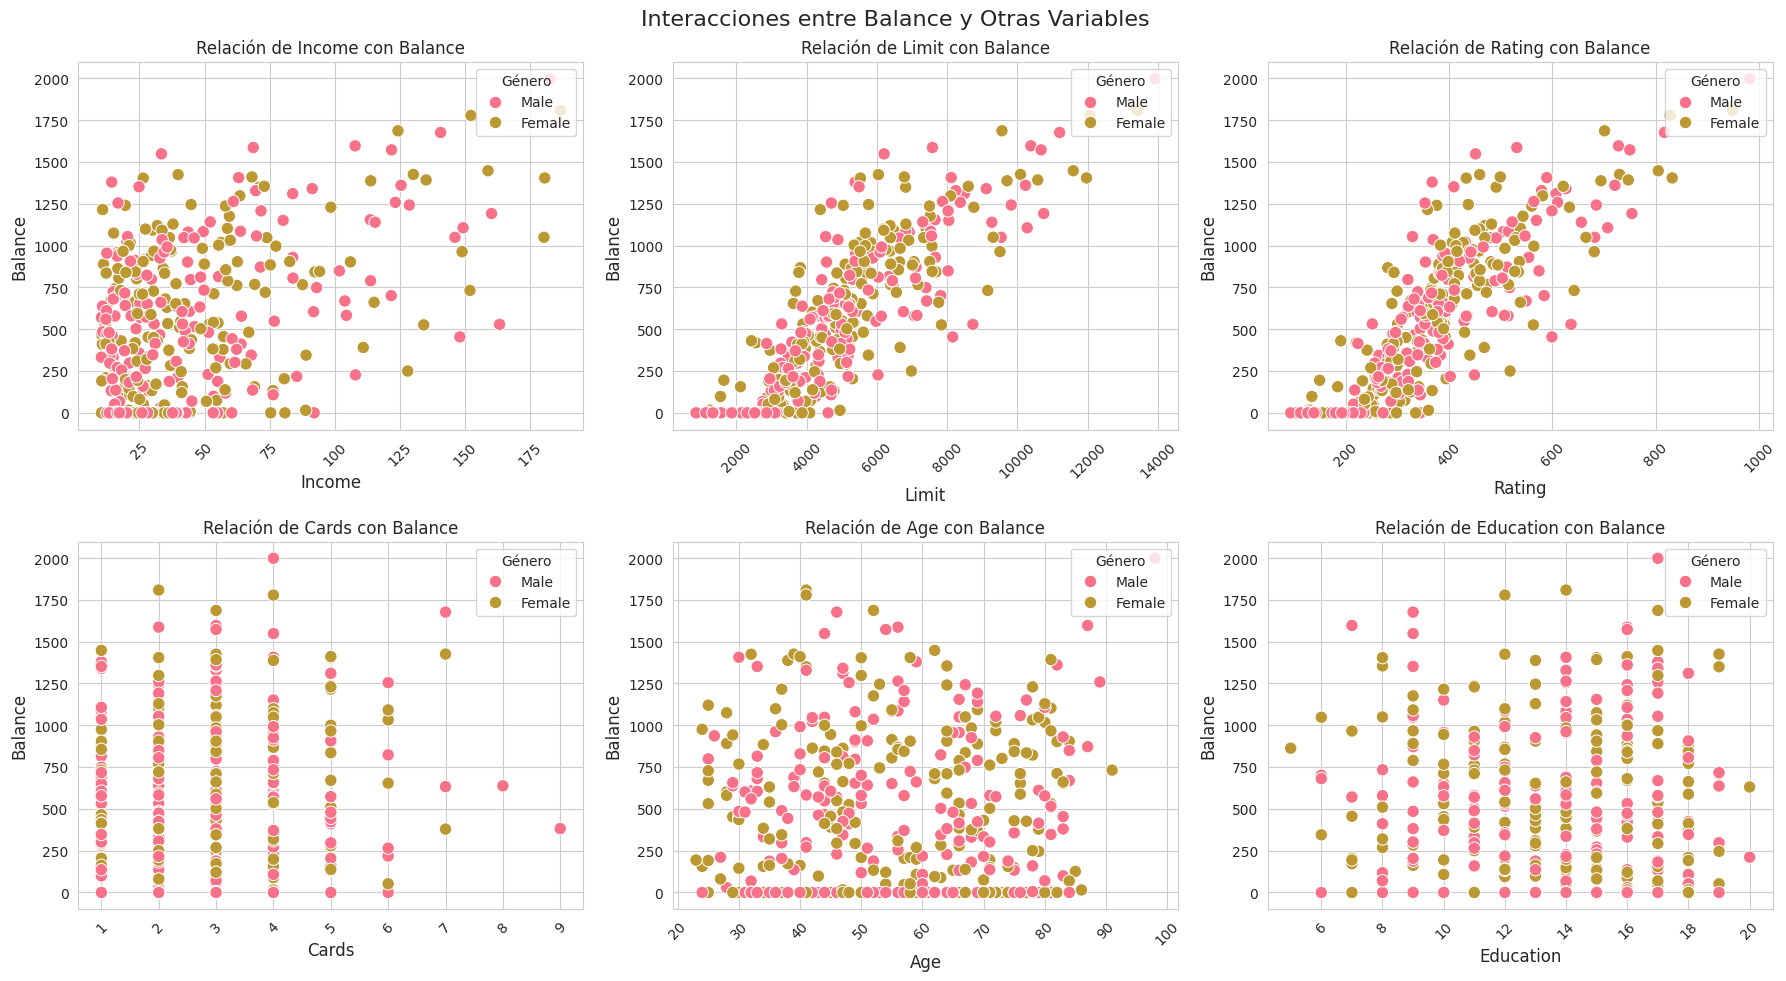

In [ ]:
# Configuración de estilo y paleta
sns.set_style("whitegrid")
sns.set_palette("husl")

# Crear subgráficos
fig, ax = plt.subplots(2, 3, figsize=(18, 10))  # 2 filas, 3 columnas
axes = ax.flatten()

# Graficar con mejoras visuales
for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y=target_col, hue='Gender', ax=axes[i], s=80)
    axes[i].set_title(f'Relación de {col} con Balance')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Balance', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(loc='upper right', title='Género')

# Mejorar el diseño general y espacio entre gráficas
fig.suptitle('Interacciones entre Balance y Otras Variables', fontsize=16)
plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
plt.tight_layout()
plt.show()

<Axes: ylabel='Income'>

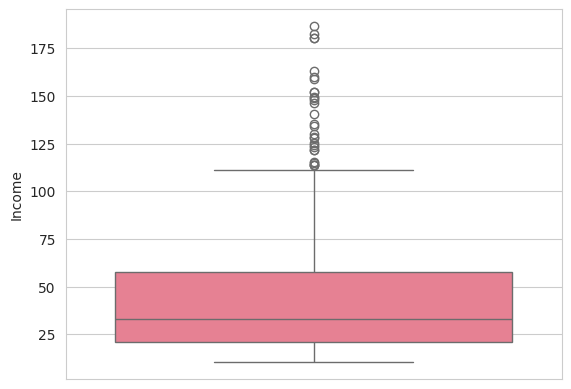

In [ ]:
sns.boxplot(df['Income'])

<Axes: ylabel='Limit'>

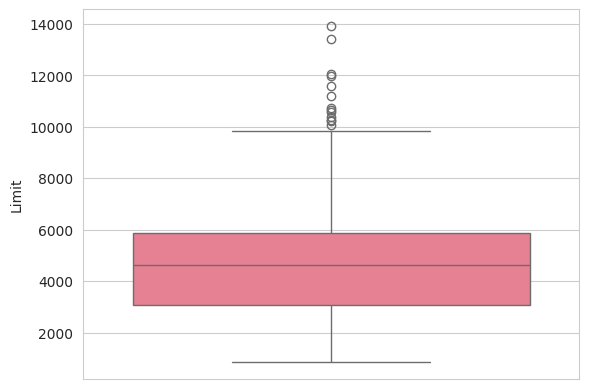

In [ ]:
sns.boxplot(df['Limit'])

<Axes: ylabel='Rating'>

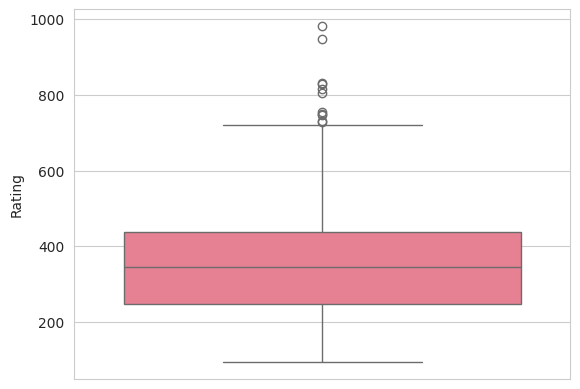

In [ ]:
sns.boxplot(df['Rating'])

<Axes: ylabel='Cards'>

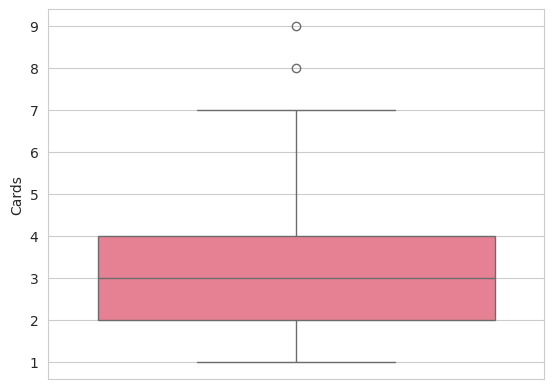

In [ ]:
sns.boxplot(df['Cards'])

<Axes: ylabel='Age'>

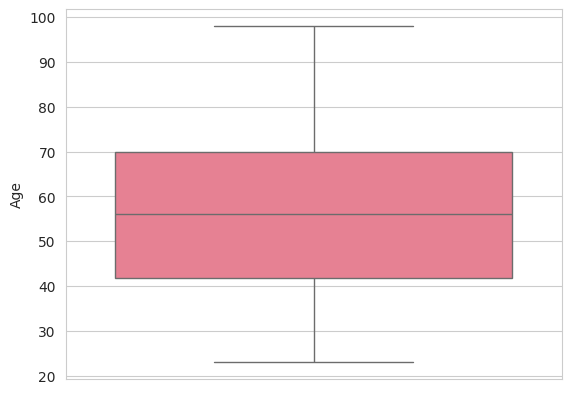

In [ ]:
sns.boxplot(df['Age'])

<Axes: ylabel='Education'>

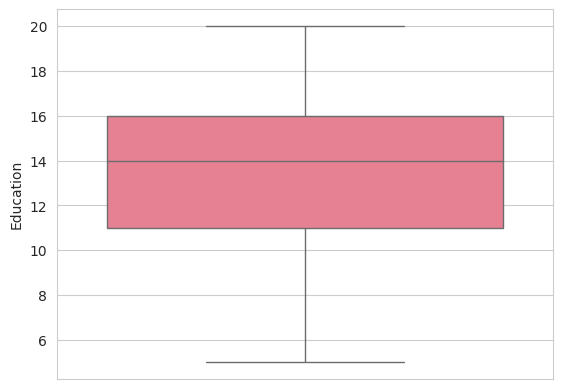

In [ ]:
sns.boxplot(df['Education'])

<Axes: ylabel='Balance'>

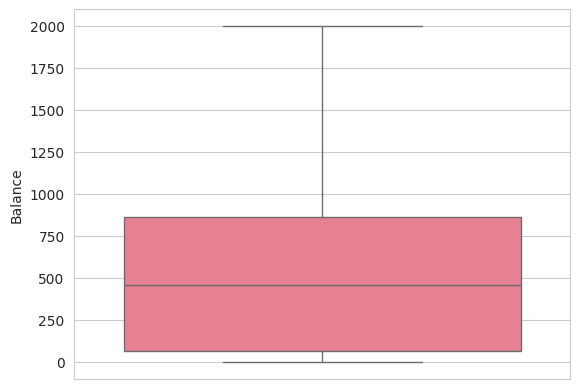

In [ ]:
sns.boxplot(df['Balance'])

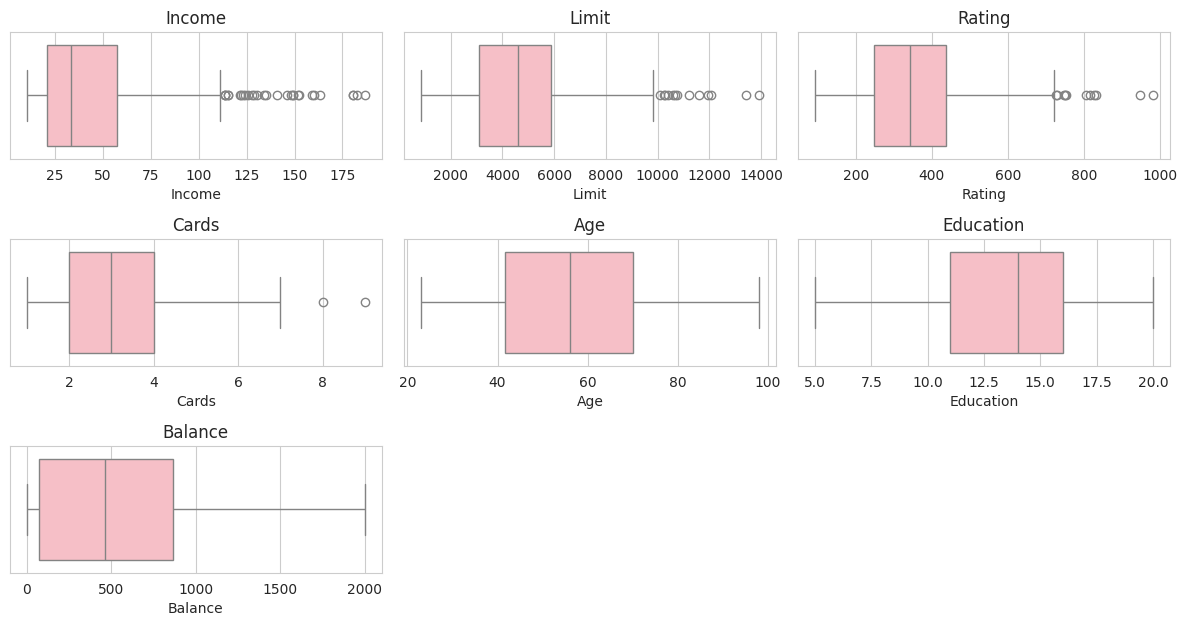

In [ ]:
#plots# Definir las columnas que quieres graficar (incluyendo Balance)
columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']

# Crear un boxplot horizontal para cada columna
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
for i, col in enumerate(columns):
    plt.subplot(4, 3, i + 1)  # 4 filas, 3 columnas
    sns.boxplot(x=df[col], color='lightpink')  # Usar 'y' para hacer el boxplot horizontal
    plt.title(col)  # Agregar el título de la columna

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout()
plt.show()

In [ ]:
df.head()

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

Vamos a quitar las variables como ID, Gender,Married and	Ethnicity

In [ ]:
x=df.drop(columns=['Gender','Married','Ethnicity','Student'])

In [ ]:
x


Income  Limit  Rating  Cards  Age  Education  Balance
0     14.891   3606     283      2   34         11      333
1    106.025   6645     483      3   82         15      903
2    104.593   7075     514      4   71         11      580
3    148.924   9504     681      3   36         11      964
4     55.882   4897     357      2   68         16      331
..       ...    ...     ...    ...  ...        ...      ...
395   12.096   4100     307      3   32         13      560
396   13.364   3838     296      5   65         17      480
397   57.872   4171     321      5   67         12      138
398   37.728   2525     192      1   44         13        0
399   18.701   5524     415      5   64          7      966

[400 rows x 7 columns]

In [ ]:
x.corr()

Income     Limit    Rating     Cards       Age  Education  \
Income     1.000000  0.792088  0.791378 -0.018273  0.175338  -0.027692   
Limit      0.792088  1.000000  0.996880  0.010231  0.100888  -0.023549   
Rating     0.791378  0.996880  1.000000  0.053239  0.103165  -0.030136   
Cards     -0.018273  0.010231  0.053239  1.000000  0.042948  -0.051084   
Age        0.175338  0.100888  0.103165  0.042948  1.000000   0.003619   
Education -0.027692 -0.023549 -0.030136 -0.051084  0.003619   1.000000   
Balance    0.463656  0.861697  0.863625  0.086456  0.001835  -0.008062   

            Balance  
Income     0.463656  
Limit      0.861697  
Rating     0.863625  
Cards      0.086456  
Age        0.001835  
Education -0.008062  
Balance    1.000000

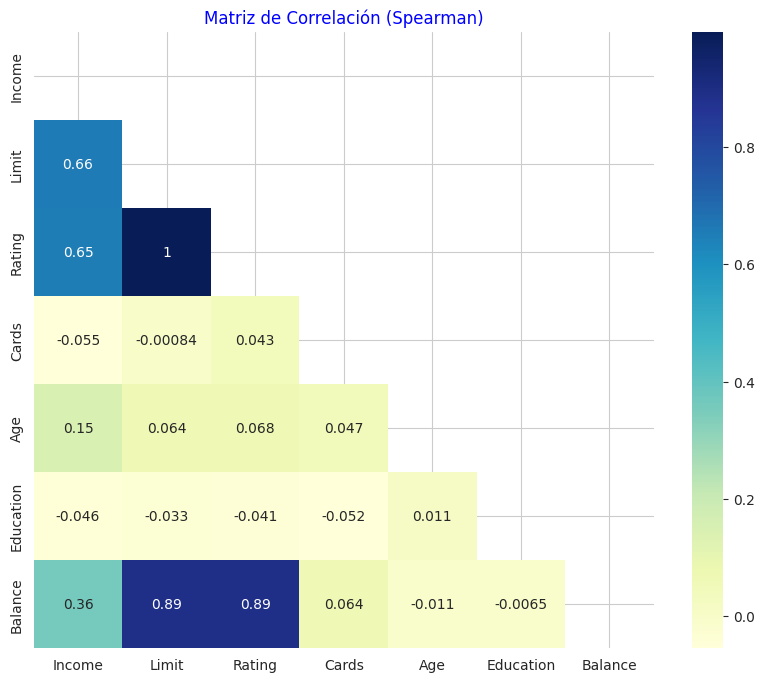

In [ ]:
corr = df.select_dtypes(exclude='object').corr(method='spearman')

# Crear la máscara
mask = np.triu(np.ones_like(corr, dtype=bool))  # Usar dtype=bool para crear la máscara

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu", cbar=True)

# Títulos y configuraciones
plt.title('Matriz de Correlación (Spearman)', fontdict={'color': 'blue', 'fontsize': 12})
plt.show()

In [ ]:
x.cov()

Income         Limit         Rating      Cards          Age  \
Income      1242.158791  6.443701e+04    4315.492940  -0.883108   106.598192   
Limit      64437.012874  5.327782e+06  356019.735338  32.383960  4016.951880   
Rating      4315.492940  3.560197e+05   23939.560301  11.295689   275.343409   
Cards         -0.883108  3.238396e+01      11.295689   1.880395     1.015909   
Age          106.598192  4.016952e+03     275.343409   1.015909   297.555833   
Education     -3.050151 -1.698697e+02     -14.571930  -0.218922     0.195113   
Balance     7513.027779  9.144460e+05   61434.665063  54.506905    14.553872   

            Education        Balance  
Income      -3.050151    7513.027779  
Limit     -169.869674  914445.988471  
Rating     -14.571930   61434.665063  
Cards       -0.218922      54.506905  
Age          0.195113      14.553872  
Education    9.766917     -11.583208  
Balance    -11.583208  211378.225338

In [ ]:
import statsmodels.api as sm

In [ ]:
x1=x.drop(columns=['Balance'])
x1

Income  Limit  Rating  Cards  Age  Education
0     14.891   3606     283      2   34         11
1    106.025   6645     483      3   82         15
2    104.593   7075     514      4   71         11
3    148.924   9504     681      3   36         11
4     55.882   4897     357      2   68         16
..       ...    ...     ...    ...  ...        ...
395   12.096   4100     307      3   32         13
396   13.364   3838     296      5   65         17
397   57.872   4171     321      5   67         12
398   37.728   2525     192      1   44         13
399   18.701   5524     415      5   64          7

[400 rows x 6 columns]

In [ ]:
y1=x['Balance']
y1

0      333
1      903
2      580
3      964
4      331
      ... 
395    560
396    480
397    138
398      0
399    966
Name: Balance, Length: 400, dtype: int64

In [ ]:
modelo_de_regresion_lineal_simple=sm.OLS(y1,x1)

In [ ]:
resultados = modelo_de_regresion_lineal_simple.fit()

In [ ]:
resultados.rsquared

0.9364313946919721

Otra variable


In [ ]:
x2=x.drop(columns=['Limit'])
x2

Income  Rating  Cards  Age  Education  Balance
0     14.891     283      2   34         11      333
1    106.025     483      3   82         15      903
2    104.593     514      4   71         11      580
3    148.924     681      3   36         11      964
4     55.882     357      2   68         16      331
..       ...     ...    ...  ...        ...      ...
395   12.096     307      3   32         13      560
396   13.364     296      5   65         17      480
397   57.872     321      5   67         12      138
398   37.728     192      1   44         13        0
399   18.701     415      5   64          7      966

[400 rows x 6 columns]

In [ ]:
y2=x['Limit']
y2

0      3606
1      6645
2      7075
3      9504
4      4897
       ... 
395    4100
396    3838
397    4171
398    2525
399    5524
Name: Limit, Length: 400, dtype: int64

In [ ]:
modelo_de_regresion_lineal_simple1=sm.OLS(y2,x2)
resultados1 = modelo_de_regresion_lineal_simple1.fit()
resultados1.rsquared

0.9991010593810351

In [ ]:
x3=x.drop(columns=['Rating'])
y3=x['Rating']
x3=sm.add_constant(x3)
modelo_de_regresion_lineal_simple2=sm.OLS(y3,x3)
resultados2 = modelo_de_regresion_lineal_simple2.fit()
resultados2.rsquared

0.995736913480706

In [ ]:
x4=x.drop(columns=['x4'])
y4=x['x4']
x4=sm.add_constant(x4)
modelo_de_regresion_lineal_simple3=sm.OLS(y4,x4)
resultados3 = modelo_de_regresion_lineal_simple3.fit()
resultados3.rsquared

KeyError: "['x4'] not found in axis"

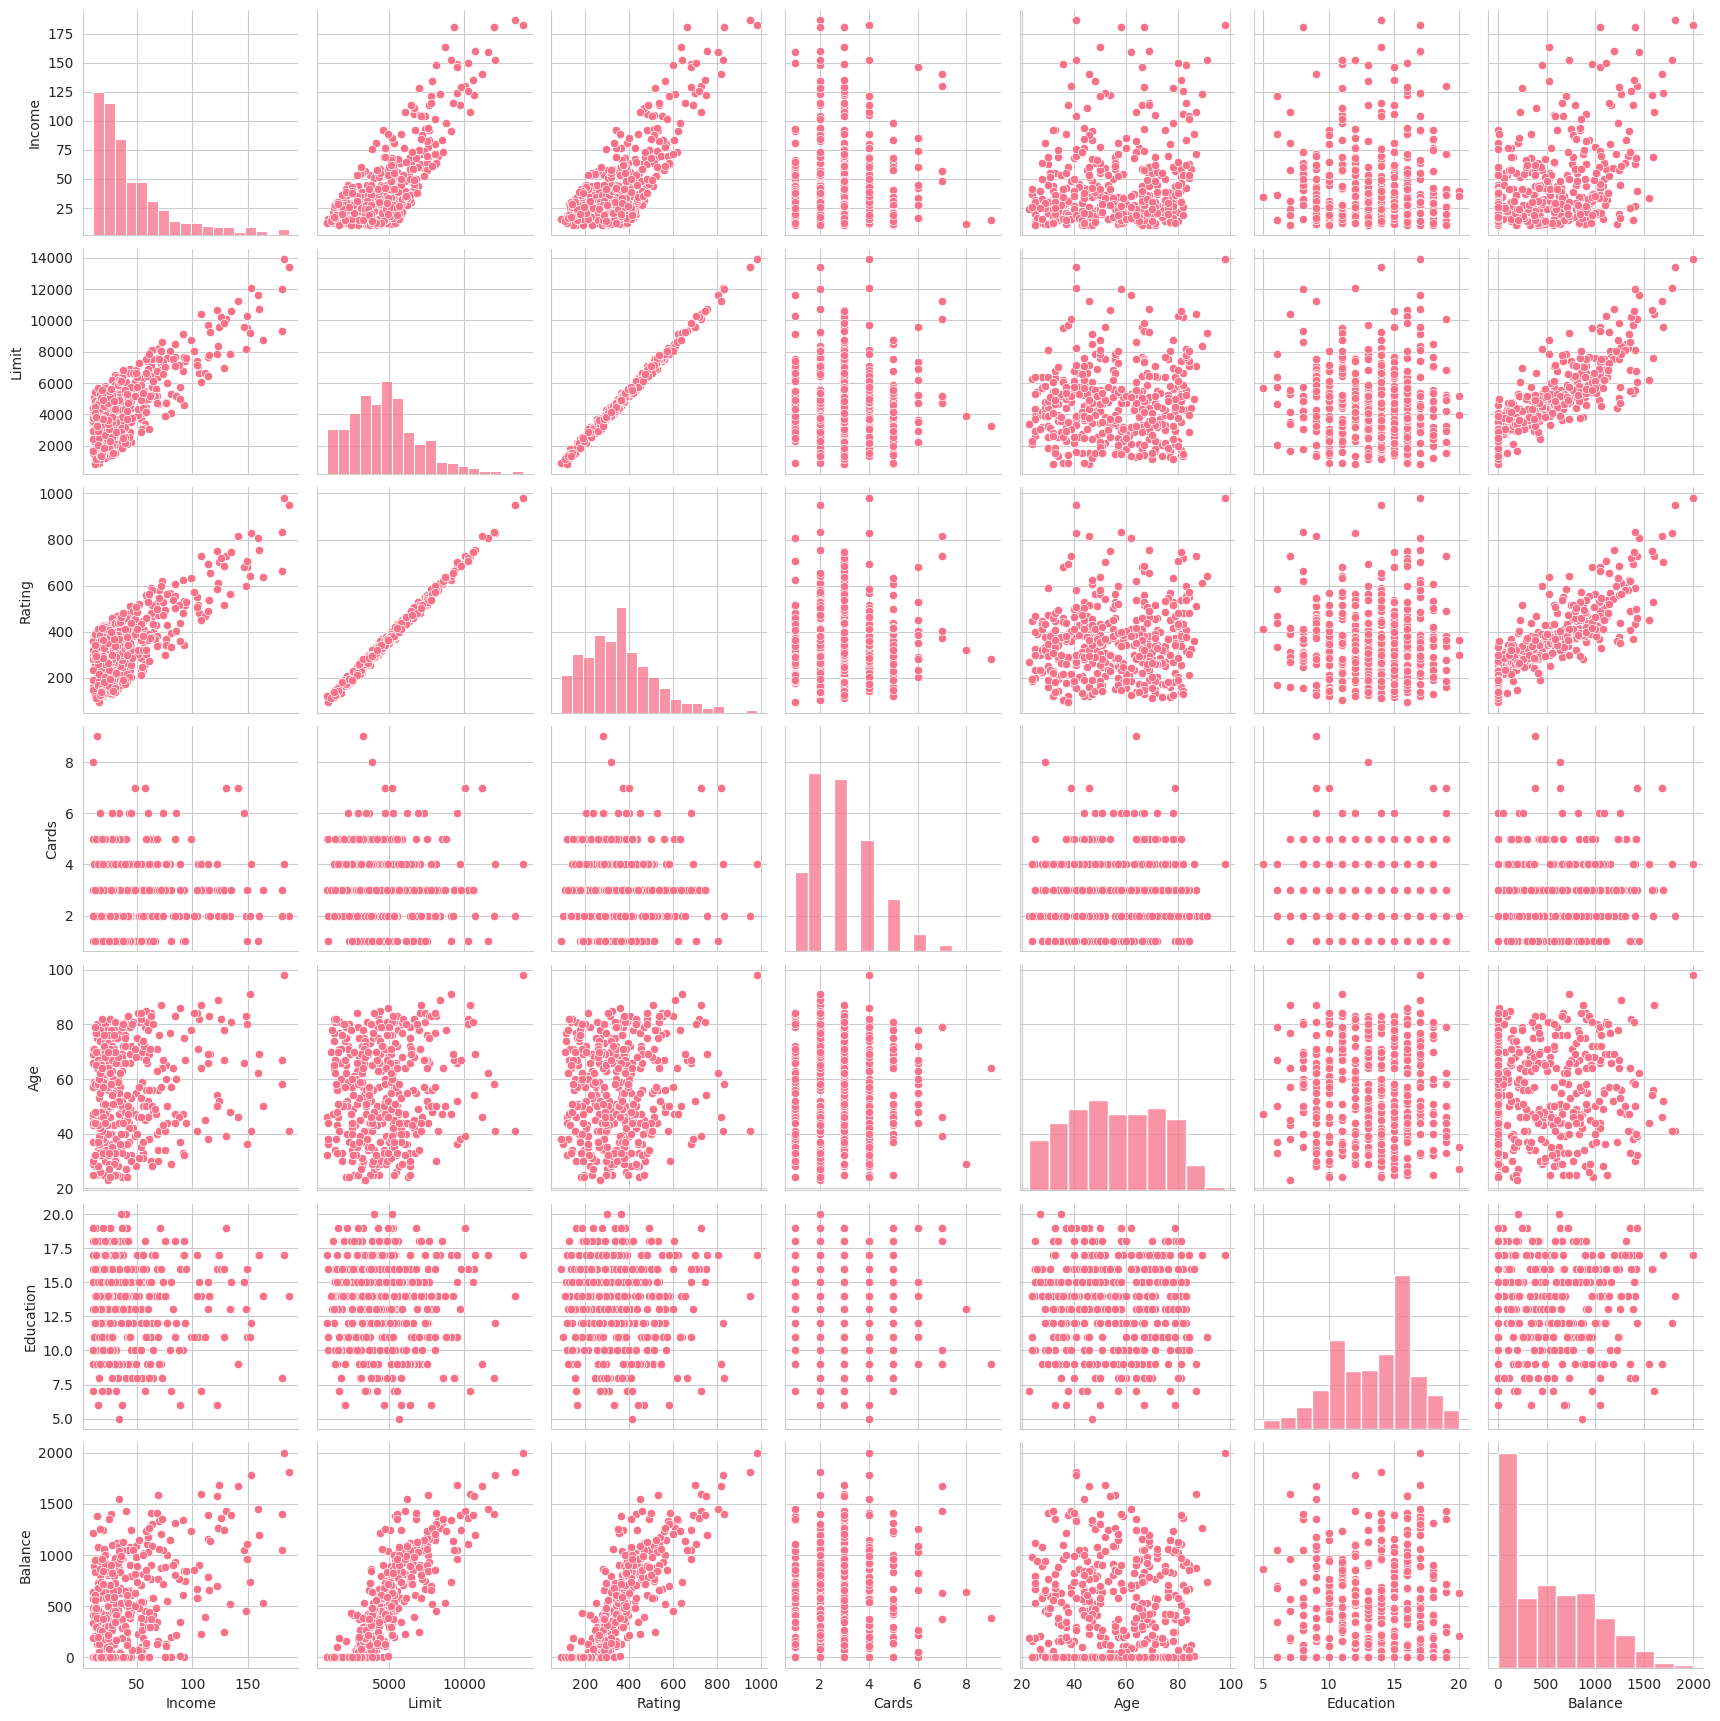

In [ ]:
# Graficos biplot
import seaborn as sbs
sbs.pairplot(df)

In [ ]:
data=pd.read_csv('Credit_alterado.csv')

In [ ]:
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2

# Distancia de Mahalanovis
def calculate_mahalanobis(df2):
    # Calcular la media y la matriz de covarianza del DataFrame
    mean = np.mean(df2, axis=0)
    cov_matrix = np.cov(df2.values.T)

    # Use pseudo-inverse instead of regular inverse
    inv_cov_matrix = np.linalg.pinv(cov_matrix) # Changed to pinv

    # Calcular la distancia de Mahalanobis para cada observación
    mahalanobis_distances = df2.apply(lambda row: mahalanobis(row, mean, inv_cov_matrix), axis=1)

    return mahalanobis_distances

In [ ]:
## Distancia de Mahalanovis
#def calculate_mahalanobis(df2):
    # Calcular la media y la matriz de covarianza del DataFrame
   # mean = np.mean(df2, axis=0)
   # cov_matrix = np.cov(df2.values.T)
    #inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calcular la distancia de Mahalanobis para cada observación
    #mahalanobis_distances = df2.apply(lambda row: mahalanobis(row, mean, inv_cov_matrix), axis=1)

    #return mahalanobis_distances

In [ ]:
calculate_mahalanobis(data)

0      2.993147
1      4.542753
2      3.656528
3      4.628002
4      2.774778
         ...   
395    2.770621
396    3.651840
397    3.229582
398    3.122565
399    4.252528
Length: 400, dtype: float64

In [ ]:
from sklearn.covariance import MinCovDet

In [ ]:
# Distancia de Mahalanovis robusta
def mahalanobis_robusta(df2):
    # Calcular la media y la matriz de covarianza del DataFrame
    # Convert only numerical columns to numpy array
    array_df2 = df2.select_dtypes(include=np.number).to_numpy() # This line is changed
    mcd = MinCovDet().fit(array_df2)
    mean = mcd.location_
    cov_robusta = mcd.covariance_
    # Use pseudo-inverse instead of inverse
    inv_cov_matrix = np.linalg.pinv(cov_robusta)

    # Calcular la distancia de Mahalanobis robusta para cada observacion para cada observación
    # Apply mahalanobis to numerical columns only
    mahalanobis_distances_robusta = df2.select_dtypes(include=np.number).apply(lambda row: mahalanobis(row, mean, inv_cov_matrix), axis=1) # This line is changed

    return mahalanobis_distances_robusta

In [ ]:
mahalanobis_robusta(data)

/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_robust_covariance.py:748: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


0      2.967214
1      7.169201
2      4.198143
3      5.847580
4      2.890600
         ...   
395    2.888183
396    3.700713
397    3.404319
398    3.431799
399    4.337345
Length: 400, dtype: float64

In [ ]:
def detect_outliers_mahalanobis(df2, threshold=0.95):
    # Calcular las distancias de Mahalanobis
    distances = calculate_mahalanobis(df2)

    # chi2 proviene del modulo scipy

    # Calcular el valor crítico del chi-cuadrado para detectar outliers
    chi2_threshold = chi2.ppf(threshold, df2.shape[1])

    # Identificar los outliers (distancias mayores al valor crítico)
    outliers = distances > np.sqrt(chi2_threshold)

Clase 25 de Agosto

# **Analisis de Componentes**

In [ ]:
data

ID   Income  Limit  Rating  Cards  Age  Education  Gender  Student  \
0      1   14.891   3606     283      2   34         11       0        0   
1      2  106.025   6645     483      3   82         15       0        1   
2      3  104.593   7075     514      4   71         11       0        0   
3      4  148.924   9504     681      3   36         11       0        0   
4      5   55.882   4897     357      2   68         16       0        0   
..   ...      ...    ...     ...    ...  ...        ...     ...      ...   
395  396   12.096   4100     307      3   32         13       0        0   
396  397   13.364   3838     296      5   65         17       0        0   
397  398   57.872   4171     321      5   67         12       0        0   
398  399   37.728   2525     192      1   44         13       0        0   
399  400   18.701   5524     415      5   64          7       0        0   

     Married  Caucasian  Asian  African American  Balance  
0          1          1      0                 0      333  
1          1          0      1                 0      903  
2          0          0      1                 0      580  
3          0          0      1                 0      964  
4          1          1      0                 0      331  
..       ...        ...    ...               ...      ...  
395        1          1      0                 0      560  
396        0          0      0                 1      480  
397        1          1      0                 0      138  
398        1          1      0                 0        0  
399        0          0      1                 0      966  

[400 rows x 14 columns]

# **Elegir los componentes principales**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
columnas = data.columns.tolist()
columnas

['ID',
 'Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Caucasian',
 'Asian',
 'African American',
 'Balance']

In [ ]:
data[columnas]=ss.fit_transform(data[columnas])
data.head()

ID    Income     Limit    Rating     Cards       Age  Education  \
0 -1.727726 -0.861583 -0.489999 -0.465539 -0.699130 -1.257674  -0.784930   
1 -1.719066  1.727437  0.828261  0.828703  0.031032  1.528451   0.496588   
2 -1.710406  1.686756  1.014787  1.029311  0.761194  0.889964  -0.784930   
3 -1.701745  2.946152  2.068440  2.110003  0.031032 -1.141586  -0.784930   
4 -1.693085  0.302928  0.070012  0.013331 -0.699130  0.715831   0.816968   

   Gender   Student   Married  Caucasian     Asian  African American   Balance  
0     0.0 -0.333333  0.795395   1.005013 -0.585049         -0.573501 -0.407277  
1     0.0  3.000000  0.795395  -0.995012  1.709260         -0.573501  0.834056  
2     0.0 -0.333333 -1.257237  -0.995012  1.709260         -0.573501  0.130634  
3     0.0 -0.333333 -1.257237  -0.995012  1.709260         -0.573501  0.966900  
4     0.0 -0.333333  0.795395   1.005013 -0.585049         -0.573501 -0.411633

In [ ]:
pca3=PCA(n_components=8)
pca_3=pca3.fit_transform(data[columnas])
pca_3[:401]

array([[-1.23787572,  1.05381591, -0.59396851, ..., -2.07657355,
        -0.49890201, -1.04986291],
       [ 2.22941758, -1.92354693, -1.6855282 , ...,  1.36587759,
         0.88056858, -1.33074517],
       [ 1.88913854, -1.49283568, -0.71559905, ...,  0.92766625,
        -0.25435227, -1.82162496],
       ...,
       [-0.36275782,  1.66535124,  0.06903602, ...,  0.78901488,
         0.78551423,  1.46302481],
       [-1.77734078,  1.62238724, -0.30812777, ..., -0.19940332,
        -1.0773572 ,  0.82395938],
       [ 0.57364338, -0.83956858, -0.67034589, ...,  1.83288115,
        -1.23949981,  1.84354859]])

In [ ]:
data3=pd.DataFrame({'PCA1':pca_3[:,0],'PCA2':pca_3[:,1],'PCA3':pca_3[:,2],'PCA4':pca_3[:,3],'PCA5':pca_3[:,4],'PCA6':pca_3[:,5],'PCA7':pca_3[:,6],'PCA8':pca_3[:,7]})
data3.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -1.237876  1.053816 -0.593969  0.435355  0.504847 -2.076574 -0.498902   
1  2.229418 -1.923547 -1.685528  1.582598  0.148771  1.365878  0.880569   
2  1.889139 -1.492836 -0.715599 -0.606449  1.970124  0.927666 -0.254352   
3  3.801434 -1.514449 -1.331251 -0.044570  1.462369 -0.580188 -1.246269   
4 -0.040214  0.991661 -0.208069  0.036471 -0.549653 -0.570772  0.913251   

       PCA8  
0 -1.049863  
1 -1.330745  
2 -1.821625  
3 -1.509645  
4 -2.086051

In [ ]:
pca3.explained_variance_ratio_

array([0.2642799 , 0.13057167, 0.10858693, 0.08834163, 0.08319058,
       0.07901335, 0.07466389, 0.0712236 ])

In [ ]:
pca3.explained_variance_ratio_.sum()

0.8998715344160287

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

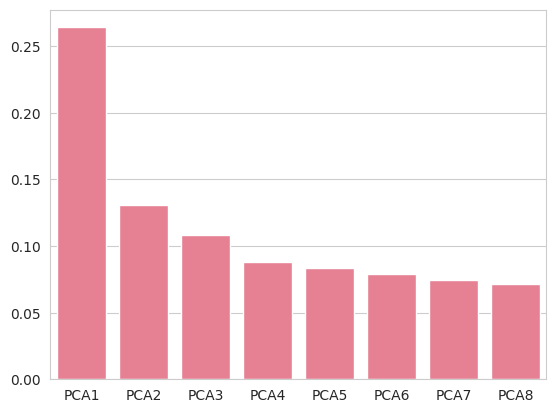

In [ ]:
sns.barplot(x=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8'],y=pca3.explained_variance_ratio_)